In [1]:
using Plots, Interact, StatsBase, JLD

using Knet

function sigmoid(z) 
    return 1.0/(1.0+exp(-z)) 
end

function f(w,x)
    x = tanh.(w[1]*mat(x) .+ w[2])
    x = (sum(x,1))
    return x
end

function relu(x)
    return max(0,x)
end

function pca(Y)
    μy = mean(Y, 2)
    Ymean = μy * ones(1, size(Y, 2))
    Ytil = Y - Ymean
    
    return svd(Y, thin = true)
end

INFO: Interact.jl: using new nbwidgetsextension protocol


pca (generic function with 1 method)

# Generating from $\mathcal{N}(0,1)$

Earlier we had matched distributions. But suppose we just want to sample from a standard normal and still generate good digits. In that case we need some preprocessing step to match distributions. 

## Matching Scalar distributions

First let us look at matching scalar distributions. We can do this as follows. Let $F$ be the cdf for a normal distribution and let $G$ be the cdf for the distribution that we want to match. Then we think about matching distributions in the following sense. 

We sample an $x$ from the standard normal. Then $F(x)$ gives the probability that we sample a number smaller then this. Hence we then do $G^{-1}(F(x))$. To get our sample from the new distribution. Thus we want to learn the function $G^{-1} \circ F$. (If $G$ is not invertible we define $H(x) = \inf G^{-1}(x)$ which is now a well defined function.

Now we now that we can learn Functions using neural networks. Hence here we will consider a neural network with $N$ neurons to as follows $$ f(x) = \sum_{i=1}^N \tanh(w_i x + b_i) $$

Let us see how this does in the following widget

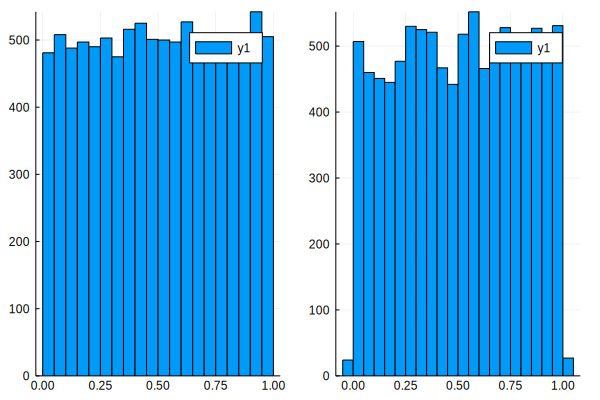

In [2]:
@manipulate for Distribution = ["Uniform", "Exponential", "Weird"]
    if Distribution == "Uniform"
        y = rand(1,10000)
        y[1,:] = sort(y[1,:])
        w = load("uniform.jld")["w"]
    elseif Distribution == "Exponential"
        y = -log.(1-rand(1,10000))
        y[1,:] = sort(y[1,:])
        w = load("exp.jld")["w"]
    elseif Distribution == "Weird"
        y = max.(-log.(1 - rand(1,10000)) - 3*randn(1,10000), 2*rand(1,10000)-1)
        y[1,:] = sort(y[1,:])
        w = load("weird.jld")["w"]
    end
    
    p1 = histogram(y[1,:])
    
    x = randn(1,10000)
    ygen = f(w,x)
    
    p2 = histogram(ygen[1,:])
    
    p = [p1, p2]
    
    plot(p..., layout = 2)
end
        
        

As we can see from above that it does pretty well. Thus let use this to match the distributions for the PCA and ICA generation, so that we are now sampling from standard normal to generate digits 

## PCA

In [79]:
@manipulate for k = [2,4,6,8,10,12]
    w = load("w.jld")["w"]
    c = load("w.jld")["c"]
    x = zeros(k,9)
    for i = 1:k
        x[i,:] = c[i]*f(w[i], randn(1,9))
    end

    D = load("./../GAN/PCA0.jld");
    Y = D["Y"];
    
    U,S,V = pca(Y)
    F = U * diagm(S)

    im = relu.(-1*(F[:,2:k]*x[2:k,:] .+ 0.05*F[:,1]))
    im = reshape(im, 28,28,:)
    p = [heatmap(im[:,:,i]', yflip = true, color=:grays) for i=1:9]
    plot(p..., layout = 9)
end

Interact.Options{:ToggleButtons,Any}(193: "input-57" = 2 Any , "k", 2, "2", 0, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("2"=>2,"4"=>4,"6"=>6,"8"=>8,"10"=>10,"12"=>12), Dict{Any,Any}(Pair{Any,Any}(4, "4"),Pair{Any,Any}(10, "10"),Pair{Any,Any}(2, "2"),Pair{Any,Any}(8, "8"),Pair{Any,Any}(6, "6"),Pair{Any,Any}(12, "12"))), Any[], Any[], true, "horizontal")

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 5 
 
 
 10 
 
 
 15 
 
 
 20 
 
 
 25 
 
 
 5 
 
 
 10 
 
 
 15 
 
 
 20 
 
 
 25 
 
 
<image width="91" height="97" xlink:href="data:image/png;base64,
iVBORw0KGgoAAAANSUhEUgAAAFsAAABhCAYAAAC5191SAAAGAElEQVR4nO2dV1MbWRCFG5ODTDQm
mmiyi///NzAFZQqwyTkZbIIN7NP2frdLo4VB28i1fZ6OBHckdd05Oh1mVFUoFB4l4II3r/0G/k+I
YDsigu2ICLYjItiOiGA7IoLtiAi2IyLYjohgO6Lmtd+ARVVVlfI3b9K9wMePj8WrDPZ5Ps7iXoid
7YgItiPcZITyICJSXV2tvL6+Xnlzc7Pyjo6OZE1bW1vR/6urq1N+f3+frLm+vlb+/fv3f+UiIj9/
/lR+d3en/OHhQXkeGYqd7YgItiMi2I74TzWbVo0aLSLS0tKivKurS/mHDx+Uj46OJmuGh4eV9/T0
KH/79q1yq6Xn5+fKt7e3la+vrxflIiI7OzvKT09PlVP/f//+Lc9F7GxHRLAdUXYZocUjp1UTEenr
61M+OTmpfG5uTvnHjx+TNZSYzs5O5ZQkKyO0dSMjI8r7+/uLHktEpLGxUfna2pryo6Mj5dZiPsUK
xs52RATbERFsR5RFs7N0uqmpSfn79++TNdPT08rn5+eVT0xMKB8cHEzWtLa2Ks9K0ZlSi6TfFb29
vcprav756NaW8ni/fv1SfnNzo5xpvP2/LMTOdkQE2xFlt348vVmlGx8fT/6PMjIzM6Oc0sFjiaTZ
ICtzzOzs6U0bx0yTEmczVR7j8vJS+eHhofKLi4tkTchIhSGC7YgItiPKotms7hUKBeWs0k1NTSVr
mJYPDQ0ppw07ODhI1uzt7RXlrMzZahx1mtaPr8nvFvu+T05OlH/9+lX57u5usobfG1mIne2ICLYj
csmIbd6yYctGAC0VrZ5IeqrS4lEelpeXkzUs8vM0piW0Foyyxkofs8TZ2dlkTXt7u3JWGrn+y5cv
yRrbNC6G2NmOiGA7IoLtiLJoNitrAwMDytmBYZdEJNXS/f195dTpz58/J2u+ffumnKnz1dWVclv1
Y7rO1JvdHXaNRNKSwbt375R3d3cXPe5TETvbERFsR+SSETvKS6tEu8dKH09HEZEfP34oZ2a2tLSk
3Noryg0l4fb2VrltvLI6yOyUFtPaNh6D1UFmmnxeJJXWrOZv7GxHRLAdEcF2RC7Ntg1SWqKsQRi7
hhW91dVV5VkpuYjI2dmZcuo0U29rS2kFWZmjlrORa8HGMMsS9vPEkE6FIYLtiFwywtNJJM0amY3R
Ktlq3ObmpnLO01E6rCWjdPB4lIpSl5MQtbW1RZ+3KDWTQoT1qzBEsB2RS0YaGhqSx8wOOX7LU/X4
+DhZwwyOmWHWbIhI9pVbWeNv9j2wYJZ15ZlIKgN8D5Q1O58SbqTCEMF2RATbEbk0287gsRDPonqW
9omk2kwtLHVFVpb1ok5bW8oxY86NsEHAqqVIais5N8KGBauW9j2E9asARLAdkUtGWJwRyc7SeDpZ
CSj1t79hbRybFuSUrlKjZJxdYcGM/VCRtDGxtbVVlJcqXmUhdrYjItiOiGA7Ipdml2qqZl3uYOcs
eOMWzgdSL0sV6FkyYImA9k4kvYSEY8psbFiLSW1m05kVyaeMCFvEznZEBNsRuWTESgV7g7yKipaO
mZxIOlPC9cwAOVYmkto9Zq3sgdLqiYiMjY0pZ2ODEsVGhkg6AreysqKclcuo+lU4ItiOiGA7Ipdm
21SV916ibaK9or0TEfn06ZNydkqosbSBFlzDmxDY1+F3BXWWOm1HkxcWFpTz87DSZ2/u8hTEznZE
BNsRZZcRnoLM7GxTlU1iZpOszNnXoZWkdWNT11owXpBKG7e4uFiUi6TjcFkjb3F70ApHBNsREWxH
5NJsm6py/Jc2io1hWyWj9WMaTatmU3zqJI9HXd3Y2EjWsGrHS0g4X8jvHHs86nTc0vkPQgTbEVXl
+D1INoBp8XgnYHuPKD7mvT+4xs6A0ApynoPZIC9MtX/jTCGlwlrMp44JPxexsx0RwXZEBNsRZdFs
gt0Uanmp+UA2b8ntMBD1k5aMDWc7U0g9ZmP3pTYuD2JnOyKC7Yiyy8iTX9jM8T0Xr/HbYC9F7GxH
RLAdEcF2xKv9HuSfqLkvRexsR0SwHRHBdkQE2xERbEf8BeOvo62cZdEVAAAAAElFTkSuQmCC
" transform="translate(29, 12)"/>
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 50 
 
 
 100 
 
 
 150 
 
 
 200 
 
 
 250 
 
 
 300 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 5 
 
 
 10 
 
 
 15 
 
 
 20 
 
 
 25 
 
 
 5 
 
 
 10 
 
 
 15 
 
 
 20 
 
 
 25 
 
 
<image width="91" height="97" xlink:href="data:image/png;base64,
iVBORw0KGgoAAAANSUhEUgAAAFsAAABhCAYAAAC5191SAAAF1ElEQVR4nO2dV08rSRCFi3TJOeco
goTE//8bCIHISeScM+xb7dcljzXymoLdrfN0uHb7DqWew6nQ44rm5uYvCbig8qcv4P+ECLYjItiO
iGA7IoLtiAi2IyLYjohgOyKC7YgItiOqf/oCiqGyMt0LFRUVBd/Hf//6yq4+8LUs/p2Ine2ICLYj
3GTESgB/rq7++zJqa2uVt7S0JGtaW1sLvtbc3Kz8z58/yZrPz0/l9/f3ym9ubpRfXV0la25vb5U/
PT0pf3t7U16K9MTOdkQE2xERbEd8q2ZTl62No7Y2NTUp7+rqUj4yMpKsGR8fVz42Nqa8v79feWNj
Y7Lm9fVV+cnJifLNzU3lGxsbyZrd3d2Ca+7u7pRTv/MidrYjItiOcJMRa8na2tqUUwampqaUT09P
J2tmZ2eVj46OKu/u7lZO6ygi8vz8rJwWr6enRzmto0hqRT8+PpRTOt7f35M1eaxg7GxHRLAdEcF2
RNk1mzpdU1OjnPZORKSvr0/55OSkcury/Px8soZWsL29XTn/HjA9t68x3R8aGlJOeyiSpugPDw8F
Of8WiOSzgrGzHRHBdkRZZITSUVVVpby+vl45rZZIKglzc3PKKR3Dw8PJGto6ZnOs5vFWF0ktGa+H
EkdJE0mrfhcXF8qZTdpKYcjIL0ME2xERbEeU3fpRVzs6OpQPDg4m72MqTrtHS8a0WSTVycPDQ+UH
BwfK2YGxn9Hb26uc6X5DQ0Oyhu8bGBhQzkohNT8vYmc7IoLtiLLISFamSLs3MTGRrJmZmVGeJR2n
p6fJmu3tbeUs+O/t7SmnJRRJJYJ2k5klmxIiaTOZFUVmrSEjvxwRbEdEsB1RkmbbgRvqH3WN6TYr
eyKpftbV1Sk/Pz9Xvra2lqxZWVkp+BrTaFvBo2Yzdae9Y6dIJLWv7OKQh2b/ckSwHVEWGeGtygoa
LVUxe8WqHe3d0tJSsoYycnR0pJx2zzYPXl5elDOjZWXPVuwoa5QLyqXNbvOMLcfOdkQE2xERbEeU
pNl2bo+NVFb3WFnjDJ9Iqq3U3/X19YJcRGR/f1/59fW1cmpusZlCDtZw+MZqbJb+Zh0zKfQZhRA7
2xERbEeUJCM2e2JljNkYC++2QM9MMauax6aASGrXmClSEopZMmaGvB42qUVSieN8COXKWsw8iJ3t
iAi2I0qSET

ICA

In [80]:
@manipulate for k = [2,4,6,8,10,12], b1 =[0,10,15,20,40,100]
    w = load("w2.jld")["w"]
    c = load("w2.jld")["c"]
    x = zeros(k,9)
    for i = 1:k
        x[i,:] = c[i]*f(w[i], randn(1,9))
    end

    D = load("./../GAN/PCA0.jld");
    Y = D["Y"];
    
    D = load("./../GAN/ICAb476.jld");
    W = D["W"];
    
    im = relu.((W[:,1:k]*x.-b1))
    im = reshape(im, 28,28,1,:)
    p = [heatmap(im[:,:,1,i]', yflip = true, color=:grays) for i=1:9]
    plot(p..., layout = 9)

end

Interact.Options{:ToggleButtons,Any}(197: "input-58" = 2 Any , "k", 2, "2", 0, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("2"=>2,"4"=>4,"6"=>6,"8"=>8,"10"=>10,"12"=>12), Dict{Any,Any}(Pair{Any,Any}(4, "4"),Pair{Any,Any}(10, "10"),Pair{Any,Any}(2, "2"),Pair{Any,Any}(8, "8"),Pair{Any,Any}(6, "6"),Pair{Any,Any}(12, "12"))), Any[], Any[], true, "horizontal")

Interact.Options{:ToggleButtons,Any}(199: "input-59" = 0 Any , "b1", 0, "0", 0, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0"=>0,"10"=>10,"15"=>15,"20"=>20,"40"=>40,"100"=>100), Dict{Any,Any}(Pair{Any,Any}(0, "0"),Pair{Any,Any}(100, "100"),Pair{Any,Any}(10, "10"),Pair{Any,Any}(40, "40"),Pair{Any,Any}(15, "15"),Pair{Any,Any}(20, "20"))), Any[], Any[], true, "horizontal")

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 5 
 
 
 10 
 
 
 15 
 
 
 20 
 
 
 25 
 
 
 5 
 
 
 10 
 
 
 15 
 
 
 20 
 
 
 25 
 
 
<image width="91" height="97" xlink:href="data:image/png;base64,
iVBORw0KGgoAAAANSUhEUgAAAFsAAABhCAYAAAC5191SAAAFPklEQVR4nO2dR08jQRCFy+RkosgC
kUUS6UK6IPEDkPid/AEOCHEARBBZZBA5iBxFZg+rrX3dGrPjwZTBW9/pjUwzw9v2c4dqr8/v97+T
IkJUuB/gf0LNFkTNFkTNFkTNFkTNFkTNFkTNFkTNFkTNFiQm3A8gic/nc9Tv7+aKhX0dKrRnC6Jm
CxLxMVJdXc26uLiYdUzM3z/98vLSaHN0dMT67OyM9d3dHeuXl5egn0V7tiBqtiBqtiARn9mZmZms
m5ubWefl5bG+vr422iwvL7NeWFhgvbOzE7CNm+Gi9mxB1GxBIi5GsrOzjWucKb6+vrIuKChgXVNT
Y7TJyclxbI9DP9RE7oaC2rMFUbMFUbMF+VGZjcO12tpa1snJyaxvbm6MNjjdHhsbc2zT0dFhtKmv
r2f98PDA+vj4mPXp6anRxh4KOqE9WxA1W5BvHSPd3d3GdVtbG+usrCzWGB1TU1NGm5mZGdbz8/Os
cWUvMTHRaNPV1cW6srKSdUlJCeulpSWjjcbIN0PNFkTNFuTbZXZPTw/rzs5O47X8/HzWj4+PrDF/
d3d3jTb2Lswf1tbWWA8MDBivYU7j9B+HnklJSc5/wAdozxZEzRYkbDESGxvLGod4TU1NrHF4R0R0
cXHB+vDwkDUu8OMszy2zs7PG9ebmJuuMjAzWKSkprBMSEoK+j/ZsQdRsQdRsQcQyG/OOiKi9vZ01
ruDFxcWxxg1WIqKDgwPWmKvb29usr66ugn42ewUP71teXs76+fk56N+NaM8WRM0W5EtjpKioiLW9
qVpaWsoaN09xeGe/vXF2eH5+zhpX3J6enj7xxL/BKMLZKd4TZ7Bu0Z4tiJotiJotiKfMjooy/43e
3t5YV1RUsMacxqIYInMjdX9/nzWu0tmZja9hZuL9sRDHLfjZQmQW5uCyQKDndIv2bEHUbEE8xUh8
fLxxjRHR0NDAGod3OGwiMmeAuJCPP+f2FBe+7TFSPgJX8+xhKW4AY3RsbW2xxnoUt2jPFkTNFsRT
jKSlpRnXWK7V2NjIGt/Sc3NzRhtcsHdTc0EU+NAojo6io6ONNniNmxF4igzjjsicha6vr7NeXV1l
7TauEO3ZgqjZgqjZgnjKbHsjFhf/sR5uZWWFNQ7viNznNIJDP8xp3Dz2+/1Gm9zcXNaYzTjTtXMe
P18WFxdZe9mYQLRnC6JmC+IpRtLT041rHEbh2xaHdzj78gq+3fHkAJalYYwREZWVlbHGBSf8ogAs
KyYiGh8fZ42bGZ9Fe7YgarYgarYgnjLbrgHBUlossbU3GYLFrqfDL2cpLCxkjat2+DP2s+GGA+Zy
f3+/0SaUOY1ozxZEzRbEU4zYi/g4JEtNTWVtH9oPFiwfJiJqbW1ljacDcEZrnwjAxX+Mjr6+Pta3
t7efek63aM8WRM0WRM0WxFNm20Ojk5MT1jgMw2k8lggTEY2Ojjr+blxBbGlpCfgafh5gDcrExITR
ZnBwkPXw8LDjPaXQni2Imi2Ipxixy8Kmp6dZ46pbVVUV697eXqMNbtju7e2xxpMHGE9E5pcAYJkx
fjXc5OTkP58/XGjPFkTNFkTNFsRTZtt1biMjI6xxRRAP+tfV1Rlt8CTu0NAQayyKsU/eftU3tkuh
PVsQNVsQTzFir5LhQX2sB9nY2GCNs0kic2MAZ4O4+frTY8NGe7YgarYgarYgvlD8H7449ca6O8xl
e/MWi2Tu7+9ZezmF9VPQni2Imi1ISGLE040hepBIG+4h2rMFUbMFUbMFCdv3+kVyNgdCe7YgarYg
arYgarYgarYgvwDZIbWxgxs0twAAAABJRU5ErkJggg==
" transform="translate(29, 12)"/>
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 25 
 
 
 50 
 
 
 75 
 
 
 100 
 
 
 125 
 
 
 150 
 
 
 175 
 
 
 200 
 
 
 225 
 
<polyline clip-path="url(#clip2300)" style="stroke:#000000; stroke-width:1; stroke-opacity:1; fill:none" points="
 150.315,109.202 150.315,109.202 156.315,109.202 150.315,109.202 150.315,99.342 156.315,99.342 150.315,99.342 150.315,89.4821 156.315,89.4821 150.315,89.4821 
 150.315,79.6221 156.315,79.6221 150.315,79.6221 150.315,69.7622 156.315,69.7622 150.315,69.7622 150.315,59.9022 156.315,59.9022 150.315,59.9022 150.315,50.0422 
 156.315,50.0422 150.315,50.0422 150.315,40.1823 156.315,40.1823 150.315,40.1823 150.315,30.3223 156.315,30.3223 150.315,30.3223 150.315,20.4623 156.315,20.4623 
 150.315,20.4623 150.315,11.811 
 "/>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 5 
 
 
 10 
 
 
 15 
 
 
 20 
 
 
 25 
 
 
 5 
 
 
 10 
 
 
 15 
 
 
 20 
 
 
 25 
 
 
<image width="91" height="97" xlink:href="data:image/png;base64,
iVBORw0KGgoAAAANSUhEUgAAAFsAAABhCAYAAAC5191SAAAFP0lEQVR4nO2dt06jURCFxwSRk0AI
ESVyTiKHh6CgRLS8FBIlD0AFDbkhZxA5Z5DIQcBWO3vuldk1v8zYeOerjte+/s3R+PjGf10xMTEf
pIgQ5OsP8D+hZguiZguiZguiZguiZguiZguiZguiZguiZgsS4usPIElwcDBrl8vF+v393Xid/dhb
aGULomYLEnAxglFBRNTS0sI6PT3dbZvz83Pj8cHBAeuTkxPWt7e3rF9fX7/82bSyBVGzBVGzBQm4
zLa7bUlJSaxrampYx8XFsb66ujLaLC0tsZ6ZmWG9s7PD+ubm5q/XdYdWtiBqtiABFyMZGRnG48fH
R9bYdcvKymKdkpJitImMjGT99PTEGqPj7u7OaKMx4meo2YKo2YL8qMwODQ1ljcPwhIQE1naWnp2d
sR4cHGT98PDAuqqqymiDw/rCwkLWR0dHrO0hPv4efIZWtiBqtiB+HSPV1dXG4/b2dtaZmZmsr6+v
WU9MTBhtZmdnWWOkrK+vs8ZIISKqr69njSNQ7CJGRUUZbTRG/Aw1WxA1WxC/y+zm5mbWXV1dxnNl
ZWWsn5+fWU9OTrLe39832mBOI/i60dFR47nY2FjWmNk4jA8LC3P/B/wFrWxB1GxB/CJGCgoKWHd2
drJuaGgwXoczcFtbW6wxRg4PD798fVzgtd8bZ/NwBjEo6Ot1qpUtiJotiJotiM8yG4e7HR0drCsr
K1nbM3iLi4ush4aGWM/NzbG2F289Aff9ERGdnp6yDgn5Y9Hx8TFre4jvCVrZgqjZgvgsRt

In [81]:
include("./../GAN/dcgan3.jl")

DCGAN

In [82]:
wd, wg, md, mg = DCGAN.main("--epochs 0 --seed 1 --loadfile /Users/rishi/Project/GAN/2layer/models/0040.jld2");

trying to load
Weights initialized


INFO: Loading MNIST...


Array{Float32,4}
(28, 28, 1, 5923)
Array{UInt8,1}
(5923,)
Array{Float32,4}
(28, 28, 1, 1000)
Array{UInt8,1}
(1000,)
training started...
trained


In [83]:
z = DCGAN.sample_noise(Array{Float64},100,9)
x = DCGAN.gnet(wg,z,mg; training = false)

p = [heatmap(x[:,:,1,i]', yflip = true, color=:grays) for i=1:9]
plot(p..., layout = 9)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 5 
 
 
 10 
 
 
 15 
 
 
 20 
 
 
 25 
 
 
 5 
 
 
 10 
 
 
 15 
 
 
 20 
 
 
 25 
 
 
<image width="91" height="97" xlink:href="data:image/png;base64,
iVBORw0KGgoAAAANSUhEUgAAAFsAAABhCAYAAAC5191SAAAKG0lEQVR4nO2dt49VTQzF/eCSc845
g8g5L0EiCwQFCCHB0lHQUvAnUNDSICjQSggJkBAgcoZlCUvOOeecMxXmZ/Ne+c3X+FSHt8wN1lxf
28czN7d48eJfAowfP175gQMHlH/48EF5y5YtOUQ+ffqkvLi4WPn69euVP3jwwIxp1qyZ8ho1aii/
c+eO8mnTppkxly9fznvOoqIi5RUqVDBjVqxYobxLly7KX7x4obxPnz5mzP3795VXqlRJ+aNHj5S3
a9fOjKlWrZry/fv3570He2WB/xRh7IQIYydE1rRpU/NDgwYNlP/8+TPvoBYtWph/N2nSRPnDhw+V
37p1S3nXrl0Ljjl9+rRy+rj379+bMfx3lSpVlF+6dEn5vXv3zJhatWop//btm/JWrVopp18WEWnd
urXy27dvK69evXreY4mIvH37VvnUqVOV37hxQ3nM7IQIYydERrchInL06FHlCxcuVL5t2zblN2/e
NGP4SPHxXrBggfJTp06ZMQzR6DrevHmjvGbNmmYMw6vmzZsrb9iwofIrV66YMdOnT1f+9OlT5fXr
15dCOHjwoPIRI0YoZ0jnXWx5ebnyypUrK6c9YmYnRBg7IcLYCZErKysz6frhw4eVX7x4UfmcOXOU
03eKiGzatEl5mzZtlPfq1Uv59+/fzZhdu3Yp7927t3KGcbVr1zZjxo0bl/cmfvz4oZzvHBHrPxmW
TpgwQbn3v3wH8Tp79OihvHHjxmbM58+flW/evDnvsWJmJ0QYOyFyixYtMm5kyJAhyvkY79y5U/mY
MWPMQa5fv6789evXyufPn698w4YNZszXr1+V0w107NhRuXdXrDY+f/5ceVlZmXJWJ0Vs1scwrm/f
vsrfvXtnxjDr4/EYJt+9e9eMYRWTFc4LFy4oj5mdEGHshAhjJ0Ru+/btxmcz3GNKzeoZU2URkSNH
jigfO3ascoaRuVzOjKlatWre47HKxjRcxPpmjqf/fvbsmRlTp04d5SNHjlROPz1lyhQz5vHjx3k5
K4qDBw82Y06cOKH81atXyqkOxcxOiDB2QmRnzpwxP3Tr1k35yZMnlbPYf+zYMTOG2dPGjRuVM7zy
ggPFWwoLe/fuVe4reHv27FHeoUMH5Z07d1buw1JeGytw/fv3V+5FYgrADPEoEnsbfPz4Me856X5j
ZidEGDshwtgJkfnmGfpm+rKKFSsq9+Ltvn37lPfs2VM5m1qYnovYkGj58uXKme5fvXrVjHn58qVy
31jzB17w5T1QyOWx+buIDR+ZrtMGFLNFRCicz5gxQzn9fMzshAhjJ0TGDEtE5OzZs8pZZWNvBStp
/v8xm6NgwMdJxIqnrC6y/6JTp05mDMPHSZMmKWfW6QUHuiX+v3r16imnexARad++vXLeD8O448eP
mzEUrZmd8j5jZidEGDshwtgJkbE3WsT6K6bL7Jum+CtiU1VyKjDeZ7dt21Y5+8CpzgwbNsyM4fuF
qTeFYFYaRazgyp5Cvmd4LSL2vcF7YAOR7w9ct26dcgrIfM/EzE6IMHZCZP369TM/8PFkVsS+O4ZT
IvYxpJBAwcD3jbC/g+P5CPrHm9kpi/V8hL1bJCgEMDPkcUVEunfvnvd4FFbYcixiM2KGlRTDY2Yn
RBg7IcLYCZGxkiZifSGXVbAJxTeoMLyhn2azC5t/REQmT56snOEil9zxnP7amGKzv5DvHBGbLjMM
5HuH5xSxoR9TdL53/PuEISvDZDYdxcxOiDB2QmQs8IvYtlqGROztYM+ciG3z3bp1q3KKDH5VMN0A
Qy2GZF++fDFjeK0UfAnfysvHmO6CognFZxHrvriSl+7OuxGGxufOnVNOG8TMTogwdkKEsRMiq1u3
rvlhyZIlyplq0pf7HmiGOr9+/W0dpO/zK4l5Xi7F2LFjh3IflvK9wfCMYrJfecu/+X7vP/C7P/D9
QtWFpQTaRsSGv7y3lStXKo+ZnRBh7ITIvHDJHjiGZHQDvp+Dq1v5qM+cOVO5L7Y/efJEOTNDhnus
nolYF1FoaQhdmogVgBkuMrtlpVLEihYMJdmD4tuZsyxTztXD8+bN+zteAskQxk6IbNCgQeaHZcuW
KaewwEfYt/LyEeLxGAlQ2xSxb3O2LbPwQ1chYlvOGPXQrXmRgq6QmR1dD12avwa6Jbbm+ba90aNH
K1+7dq1ytk3HzE6IMHZChLET4p9lHhQ46ctYlPf+l1kWezvoL5klilgBgtU0rqLlRgMi1oczpGPG
x94QEdvOzMyO2SlXuInYbJCZMwUHv/EMw1eGmLzvmNkJEcZOiH8KUcOHD1fOhZ10FefPnzdjBgwY
oJyPEPVIZpkiNnRiaxpDMrYvi9iQjH0bzIK962E7Gh99uku2BYtYV0RO9+kX3jIcZgGO54+ZnRBh
7IQIYydExlRbxBblWemjWOqXhjAtpyjLVVc+9abPZhhXWlqq3AvLLBkwjWalkNU8ESssU5jgOf21
MeWnYMteP+4RKGKrgEzrWb6ImZ0QYeyE+KdvhI8Ns8ZGjRop99kTV2FR56NgsHv3bjOG27YdOnRI
OTMunw0yLGVmx9Y2LwRwW1Oucps7d65yX8ErtPKAbW5+i1T22GzZskU5q5MxsxMijJ0QYeyEyJWW
lpo9ohjG0d/Qrw4cONAchCFRIb/KfkARG+KxH4OVQr/pCv05t+D0Lb8EQzxuCMDtqnmdItaH873D
8oMPF2mTQr0mMbMTIoydELmlS5caN8JHjdU09oBwTyYR+xEdVry435NfjE8XwZCM+3hw1YCIDUWZ
pbFq6NvcWNFjRsr79G6IYgaPTTfiV5hxezm2IFOkjpmdEGHshAhjJ0RGXyNiU18KqQzv/JcwGNbR
x/m9pAhW5+iL6du9X2S4xcYc+m+/FxW/5sFzsofPV/BYReTmAPTl/jxUvGgDho4xsxMijJ0QGb+D
JWIX03PRKb8T6bdzY58FC/wUfynWithHlfuNsJrms7SJEyf+vXCIHnR9XgwptAMx3ScrmiLWdVBI
8PtPEeyxYVjL8TGzEyKMnRBh7ITI/AfW2APHvaAKfdVCxIY33M6Y/vfatWtmDCtj7AOn//T+l6Iq
V95SOeJXR/z1cJ9Aqi7+ax5Dhw5VzpJFoT0LRazyxL9F6Pc/IYydELmSkhJT9WO4RpGWlTH2AIoU
DqlYHfSCAz+Ww8yM3xnzISaPx6yTQoQXsJkpsmrH+/H9gewD5HWOGjVK+erVq80Yv7LtD+i6YmYn
RBg7IcLYCZH5PZX4wbWioiLlDGe4xE3EflSH4RrDxTVr1pgxs2fPzns8isx+/0CGXgwXma57kZjH
oGhNYdqvcuY7iffDe2A1UcQ2FLHHnPcWMzshwtgJkSsvLzehH3vjKJ5SxGQFUERk1apVyhlqFRcX
Ky8pKSl4EaymFVotLGKzQWZ9FBL8bsZcgsIsr9BeViJ25desWbPyXpt3cRQT2FLNz9LGzE6IMHZC
/AaHC5hEtrfODwAAAABJRU5ErkJggg==
" transform="translate(29, 12)"/>
 
 
 
 
 
 
 
 
 
 
 - 
 
 
 0.20 
 
 
 - 
 
 
 0.15 
 
 
 - 
 
 
 0.10 
 
 
 - 
 
 
 0.05 
 
 
 0 
 
 
 0.05 
 
 
 0

In [72]:
include("./../GAN/dcgan4.jl")

DCGAN

In [73]:
wd, wg, md, mg = DCGAN.main("--epochs 0 --seed 1 --loadfile /Users/rishi/Project/GAN/2lc/models/0100.jld2");

trying to load
Weights initialized
Array{UInt8,4}
(28, 28, 1, 1000)
Array{UInt8,1}
(1000,)
Array{UInt8,4}
(28, 28, 1, 100)
Array{UInt8,1}
(100,)
training started...
trained


In [78]:
z = DCGAN.sample_noise(Array{Float64},100,9)
x = DCGAN.gnet(wg,z,mg; training = false)

p = [heatmap(x[:,:,1,i]', yflip = true, color=:grays) for i=1:9]
plot(p..., layout = 9)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 5 
 
 
 10 
 
 
 15 
 
 
 20 
 
 
 25 
 
 
 5 
 
 
 10 
 
 
 15 
 
 
 20 
 
 
 25 
 
 
<image width="91" height="97" xlink:href="data:image/png;base64,
iVBORw0KGgoAAAANSUhEUgAAAFsAAABhCAYAAAC5191SAAAHl0lEQVR4nO2dyU8UURDGC0FFwB0Q
VEARJEHEeFMTEm7EhAt/Df+ZR+OJAwdJIEAiIOICrizuC4snyt8r+rUTMik91Hf6ZqbfdHfl9Te1
vTc14+PjexJI8P37d+U7OzvKGxsbKxq/sbGh/PPnz8qPVOHaAhUijO2IMLYj6v71BfyPqKv7Y5bj
x48rr6mpUb63l/+p+/Tpk/KvX78qj5ntiDC2I/5rGbGPKl/neG1tbTKGj36loIyUXU8OZ86cUX7p
0iXlMbMdEcZ2RBjbEVXX7KNHjyo/duyY8p8/fybH/fr166/fVaaR1OYvX74op6slItLc3Ky8vr5e
+Y8fP/56/sPi1KlThe/HzHZEGNsRVZcRSgezZLu7u8lxlBFm1gjrtn38+LHwu48c+TNnmLETEenr
61N+7tw55YwMt7a2kjFra2vKmbX79u1b4fXba8i5mzGzHRHGdkQY2xFV12xqJnXaun58Tc2klra2
tiZjGEY3NDQop+t3+fLlZAzD5dOnTyu/ceOG8mfPniVj6C5Sv1mBeffuXTKmElc2ZrYjwtiOqLqM
0I2jpNjHjAl2ulcnTpxQTldNJJWRV69eKX/y5InypqamZMyjR4+Ud3R0KP/w4UPh+UXSSJMRKaNj
G91SMukGEjGzHRHGdkQY2xGlmp3L4Fn9pTZTc0+ePKn8/fv32fPQ1ers7FR+5cqV5LjXr18rf/v2
rXK6dHQDRUQmJyeVz87OKqfGXrhwIRlD3acNzp8/r7xM53OIme2IMLYjSmWE0sFHi26bSPpI8nHi
GGbMRNIIkJ/R3bMu1Pb2tnJKR1tbW+G1iIg8fPhQOd1AnmdmZiYZc+vWLeUDAwPKed+MdEUq6ymJ
me2IMLYjwtiOKNVsFkWpQ7ZYSm2l/tINs80zbGSh5hJ020REVldXlTMtYF1E4t69e8qZEVxZWVFu
i8T8reI9MAtpNTt330TMbEeEsR1xQEb4eNLVYtRoC5q5LBejL9s/RxeRnz1+/Fg5H3URkZaWFuWD
g4PKGbXagkNPT49yRrSMGl+8eJGM2dzcLLxORsqMJu1nuQxgzGxHhLEdEcZ2xAHNpotH7cn1LIuk
Gs7mGeqadRdZPJ2fn1f+9OlT5f39/ckYajYzhXTdbFqA98AiLa+HbqhIWgV68OCB8u7ubuW2IsT7
sW7uPmJmOyKM7YgD2kBXJfc4WFB66AKxYGD7Rpj8Z8Q1NjZW+L7IwYxe0fvs8xBJo0G6opS7ixcv
JmMoZSxYDA0NFV6/SOoi5ooMMbMdEcZ2RBjbEaWaXSmoS+vr68qpY7a6w6wZM3MMt+lOiaT6uby8
rJwuoR1Dt7Srq0s5M40Mz0XSKs7o6GjhNdv7YUaR45nmiJntiDC2Iw7ICB8PunHMmFmXkMfxUWMP
yNzcXDKGbbos/jIDR3kQyfexUMasJNAtZPGW2U3Kk0gakTLqpDxQkkRSu1E66L7GzHZEGNsRdWfP
nk3eyMkIE/Q2smM0Rk5PwEoPvQFGcHykbW2QkSpXjvE8fF8kTaBNT08XnrMsycYCBmWMXCSVMtow
igf/CGFsR4SxHVGq2bl+PBtlsu+O2TC6Vyy8iqTFZK7C5Xdbl4yf5TKNtp+DWsrfDXLbzsx7YGGB
19ne3p6MWVxcLDwnC8sxsx0RxnZEHVdNieTdNXKbxKf0UFKYiCpry7V1w33Q3RTJt8BRruyif34H
j2OkOjU1lYxZWlpSfv/+feXXr19XbrcKpSzmzh8z2xFhbEeEsR1RZzUuh9yeTCKp5jL5T+2zq6t6
e3uVsweDumyvLbfRCl01Wzxgrwf7QVgYfvPmTTLm7t27yrmhQG5VskiaFbX9hvuIme2IMLYjKt4o
gDJis2TMzvGRZjQ3MjKSjGHNjtKRyzqK5Fc4MFlvM4WUFY7n+a9evZqMYXRIyaR02BVhzALm3MCY
2Y4IYzsijO2IQ2m21StqK3WRobstxD5//lw5Q1pm4Ox+T+wXZJqBq8hsTyHdSlaH6J7ZLCa1OdnZ
vaSnJteHSMTMdkQY2xGH2iPKZuPoKuWKDDbioku1sLCgvCyiZTGXPRyUh+Hh4WTMzZs3lTNTyL6V
ly9fJmN4HO+V92bvhzsLs6eFiJntiDC2I8LYjjiUZpet1qWWMrNmXT9myfh9dBdtww2rSHfu3FFO
nb59+3Yyhhm9iYkJ5XQ97e8EUwY8J3+DbEjOvkS6nzwuZrYjwtiOOJSM2J3cczvs8rGzi/GZEWQh
gTJkZSS3LwlXO1AeRNICBiNNgpImksoKI0hmB+3WcoywKR20VcxsR4SxHRHGdsShNNv2WlOb6fZQ
y20PHsdQm6mRNuyl5lIXWY2xK3z5GbOVZT3Z7O+7du2acm5OYFeLMfPJqg21PWa2I8LYjqhKBMnH
hhLD6Mu6SnzNtmVGfHYxPr+PRQae0yb4c5sd5P5PUiTN4LFtmtwWo/k6J1Exsx0RxnZEGNsRVfk3
DxY7yanltgebWkp3jaEyM4AiqRbyOLph9rchl7Ur+6/JnCvLzGWup7wMMbMdEcZ2RFVkJPd/jowG
7TGMDu3/dO3DtiazByT3X5M2qZ/r9Sj7i3B+xii40vbqHGJmOyKM7YjfiJCStHY0yagAAAAASUVO
RK5CYII=
" transform="translate(29, 12)"/>
 
 
 
 
 
 
 
 
 
 
 - 
 
 
 0.20 
 
 
 - 
 
 
 0.15 
 
 
 - 
 
 
 0.10 
 
 
 - 
 
 
 0.05 
 
 
 0 
 
 
 0.05 
 
 
 0.10 
 
 
 0.15 
 
 
 0.20 
 
 
 0.25 
 
<polyline clip-path="url(#clip9900)" style="stroke:#000000; stroke-width:1; stroke-opacity:1; fill:none" points="
 150.315,109.202 150.315,104.346 156.315,104.346 150.315,104.346 150.315,94.3353 156.315,94.3353 150.315,94.3353 150.315,84.3246 156.315,84.3246 150.315,84.3246 
 150.315,74.3139 156.315,74.3139 150.315,74.3139 150.315,64.3032 156.315,64.3032 150.315,64.3032 150.315,54.2925 156.315,54.2925 150.315,54.2925 150.315,44.2817 
 156.315,44.2817 150.315,44.2817 150.315,34.271 156.315,34.271 150.315,34.271 150.315,24.2603 156.315,24.2603 150.315,24.2603 150.315,14.2496 156.315,14.2496 
 150.315,14.2496 150.315,11.811 
 "/>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 5 
 
 
 10 
 
 
 15 
 
 
 20 
 
 
 25 
 
 
 5 
 
 
 10 
 
 
 15 
 
 
 20 
 
 
 25 
 
 
<image width="91" height="97" xlink:href="data:ima